### Inledning

Vi jobbar på Guldfynds IT avdelning och har fått i uppgift att analysera diamanter i python, för att genomföra eventuella investeringar. Vi har fått
tillgång till ett dataset kopplat till just diamanter.

### Syftet med denna Jupyter Notebook:
- Identifiera faktorer som påverkar diamantpriser
- Hitta lönsamma delar inom produktutbudet
- Skapa strategiska lösningar för företaget

*Alla priser visas i dollar*

Importerar bibliotek, läser in datan samt ändrar graf stilen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from pandas.api.types import CategoricalDtype

df = pd.read_csv('diamonds.csv')

sns.set_theme(style="whitegrid")

### Förhandsgranskar datan.

In [2]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Berkrivning av datan.

In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Detta dataset innehåller över 50,000 diamanter.
Väsentliga variabler: "carat", "cut", "color", "clarity", "price" samt mått (längd, bredd, och djup).
"Cut" och "Clarity" är uppdelad i olika kategorier rangordnat från bäst till sämst:  
#### "Cut":  
"Ideal"  
"Premium"  
"Very Good"  
"Good"  
"Fair"  

#### "Clarity":  
"IF"  
"VVS1"  
"VVS2"  
"VS1"  
"VS2"  
"SI1"  
"S12"  
"S13"  
"I1"  
"I2"  
"I3"

### Vi börjar med att byta namn på vissa kolumner och ta bort nollvärden, samt ändra ordningen på clarity.

In [5]:
df.rename(columns={"depth":"depth total"}, inplace=True)

In [6]:
df.rename(columns={"x":"length", "y":"width", "z":"depth"}, inplace=True)

In [7]:
df.head()

,carat,cut,color,clarity,depth total,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.dtypes

carat          float64
cut             object
color           object
clarity         object
depth total    float64
table          float64
price            int64
length         float64
width          float64
depth          float64
dtype: object

In [9]:
df.isna().sum()

carat          0
cut            0
color          0
clarity        0
depth total    0
table          0
price          0
length         0
width          0
depth          0
dtype: int64

In [10]:
df.replace(0, np.nan, inplace=True)

In [11]:
df.isna().sum()

carat           0
cut             0
color           0
clarity         0
depth total     0
table           0
price           0
length          8
width           7
depth          20
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

carat          0
cut            0
color          0
clarity        0
depth total    0
table          0
price          0
length         0
width          0
depth          0
dtype: int64

In [14]:
df.shape

(53920, 10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        53920 non-null  float64
 1   cut          53920 non-null  object 
 2   color        53920 non-null  object 
 3   clarity      53920 non-null  object 
 4   depth total  53920 non-null  float64
 5   table        53920 non-null  float64
 6   price        53920 non-null  int64  
 7   length       53920 non-null  float64
 8   width        53920 non-null  float64
 9   depth        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [16]:
clarity_order = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "SI3", "I1", "I2", "I3"]
df['clarity'] = pd.Categorical(df['clarity'], categories=clarity_order, ordered=True)

### Vi börjar nu alanysera diamanter baserat på pris, karat och slipningkvalitet.

In [17]:
fig = px.scatter(df, x='carat', y='price', color='cut', hover_data=['color', 'clarity'])
fig.show()

### Med hjälp av den interaktiva scatterplotten kan vi se att priset ökar märkbart med karat. Karat är det som har störst skillnad på pris. Vi kan även se att de orangea prickarna(Fair) ligger lågt dvs dem är billigare medans Ideal, Premium och Very Good är vanligast och ligger lite högre. Vi går vidare genom att analysera antalet diamanter per slipning.

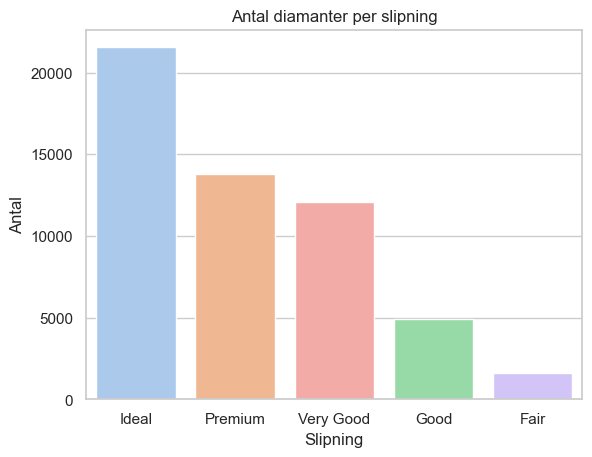

In [18]:
sns.countplot(data=df, x='cut', order=df['cut'].value_counts().index, hue='cut', palette='pastel', legend=False)
plt.title('Antal diamanter per slipning')
plt.xlabel('Slipning')
plt.ylabel('Antal')
plt.show()

### "Ideal", "Premium" och "Very Good" dominerar utbudet i datasetet. Det visar att dessa slipningar är vanligast bland diamanter. Vi tittar sedan på median priser på dem olika slipningarna.

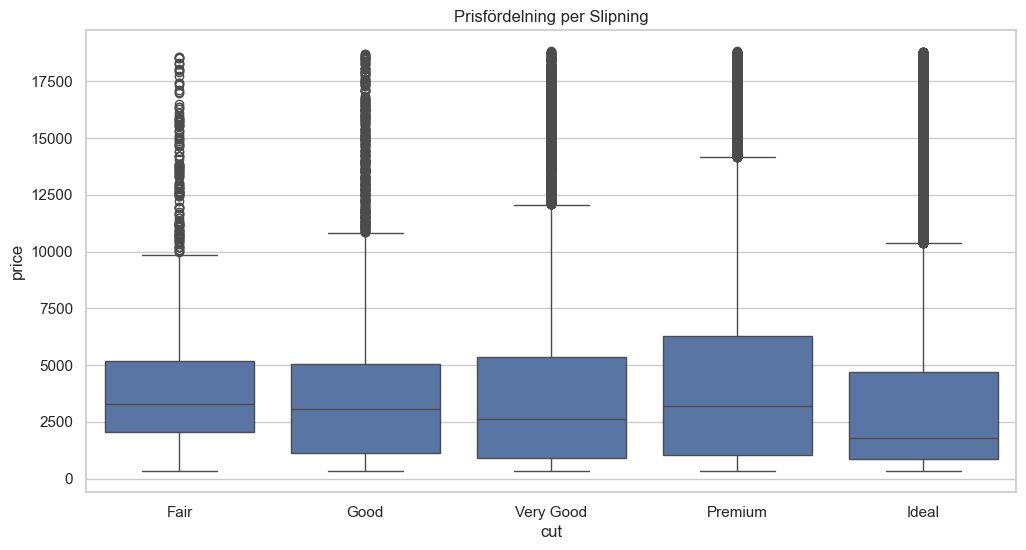

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='cut', y='price', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Prisfördelning per Slipning')
plt.show()


### Boxplotten visar att slipningen "Ideal" har lägst median pris och eftersom vi såg att flest diamanter har slipningen "Ideal" tyder det på att även små och billigare diamanter har stor fokus på bra slipningskvalitet och därmed större efterfrågan.
### Nästa steg blir att analysera genomsnittspris per klarhet och färg i form av en heatmap.

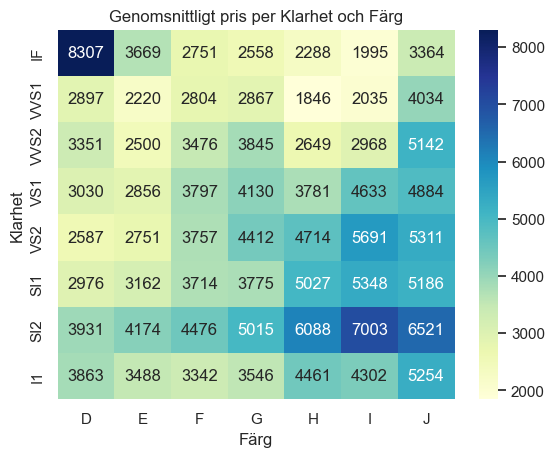

In [20]:
pivot = df.pivot_table(index='clarity', columns='color', values='price', aggfunc='mean', observed=False)
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Genomsnittligt pris per Klarhet och Färg')
plt.xlabel('Färg')
plt.ylabel('Klarhet')
plt.show()

### Det vi kan se från vår heatmap ovan är att diamanter med hög klarhet och färg (som IF–D eller VVS1–E) kostar oftast mer, men skillnaderna i pris är inte så stora som man kanske tror. Priserna kan också variera mycket, även för diamanter med samma egenskaper. I nästa steg analyserar vi korrelationer, dvs de värden som driver pris mest.

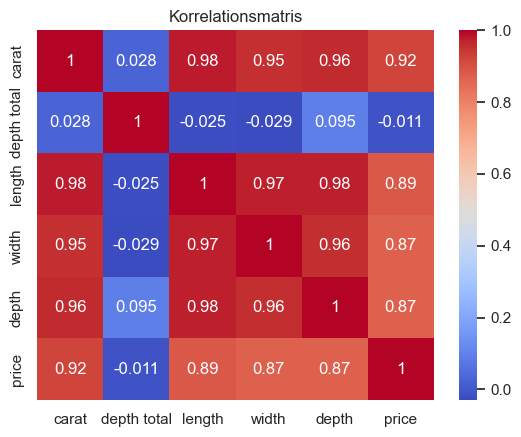

In [21]:
corr = df[['carat', 'depth total', 'length', 'width', 'depth', 'price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatris')
plt.show()

### Det vi kan se från vår korrelationsmatris är att karat har starkast samband med pris – ju större karat, desto högre pris (korrelation över 0,9). Även mått som längd, bredd och djup påverkar priset, men inte lika mycket. Faktorer som 'cut', 'color' och 'clarity' har lägre siffror i korrelationen eftersom de är kategoriska värden.

-----------------------------------------------------------------------------------------------------------------------------------------------------

## Summering

### Vi har analyserat diamantdata för att förstå vad som driver pris. Det viktigaste vi såg är att karat (storlek) har störst påverkan – ju större diamant, desto högre pris, och det är inte linjärt utan ökar snabbt.

### Slipningstyperna Ideal, Premium och Very Good är vanligast i marknaden, vilket tyder på att kunder föredrar välslipade stenar. Klarhet och färg påverkar också priset, men variationen är stor – en diamant med lägre klarhet kan ibland vara dyrare än en med högre, beroende på andra faktorer.

### Rekommendation: Guldfynd bör fokusera på att erbjuda diamanter runt 0.5–1.5 carat i populära slipningar (Ideal/Premium), med medelhög klarhet (VS1–SI1). Det ger bra balans mellan pris, marginal och efterfrågan.